<a href="https://colab.research.google.com/github/bghaendler/BJBS-AI-LAB/blob/master/BJBS_AI_Lab_Session_03_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="300" src="https://raw.githubusercontent.com/bghaendler/BJBS-AI-LAB/master/img/BJBSAILogo.png" align="right"> 
# House Price Prediction - Singapore HDB Resale Analysis

Dear Colleagues, here I am trying to explain step by step the Analysis for Singapore HDB resale price "prediction". Although the data is quite good and accurate (it is coming from SG goverment), there are not enough datapoints to do an accurate prediction. In any case, is good to do an exercise.

- **Section for Data Analyst**

As you can see below, there are several steps. **I want you to focus on the first 3 steps** 
1. Download the data
2. Understand the data (with some visualizations)
3. Feature creation
These steps are the ones that you will use the most in you daily BJB tasks

- **Section for ML geeks**

Finally, although still we haven't hace a session on Machine learning, I reproduce the process for modeling preditiction. 

In summary, the process for ML experimentation go throught
- Split the data
- Select the models and hyperparametrice
- Review the results 

I have created some new features (step 3), then I delete those that are not useful (step 4). Step 5 correct feature skewness (necessary to improve the ML accuracy). Then it is necessary to split the data into train and test set to validate the accuracy of our model (step 6) and finally I go with the ML modeling ussing regresors (why regressors? well, we are looking a price, price is a continuous value, we need regression). Then finally the predicition.

I am taking a new methodology to stack the models (still learning it) and finally, to evaluate the accuracy we use Root Mean Squared Logarithmic Error

# Section for Data Analyst

## Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1st Step: Download the data

Source of the data. Singapore goverment
https://data.gov.sg/dataset/resale-flat-prices


In [0]:
# Download only once
!mkdir data #This line of code, creates a folder called "data"
!wget https://storage.data.gov.sg/resale-flat-prices/resale-flat-prices.zip --directory-prefix=data/ #Here we donwload the Zip file from the web source
!unzip data/resale-flat-prices.zip -d data/ # finally, we unzip the content into "data" folder

--2020-04-06 13:34:45--  https://storage.data.gov.sg/resale-flat-prices/resale-flat-prices.zip
Resolving storage.data.gov.sg (storage.data.gov.sg)... 104.26.15.175, 104.26.14.175, 2606:4700:20::681a:eaf, ...
Connecting to storage.data.gov.sg (storage.data.gov.sg)|104.26.15.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66716055 (64M) [application/zip]
Saving to: ‘data/resale-flat-prices.zip’

resale-flat-prices. 100%[===================>]  63.62M  26.3MB/s    in 2.4s    

2020-04-06 13:34:48 (26.3 MB/s) - ‘data/resale-flat-prices.zip’ saved [66716055/66716055]

Archive:  data/resale-flat-prices.zip
 extracting: data/metadata-resale-flat-prices.txt  
 extracting: data/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv  
 extracting: data/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv  
 extracting: data/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv  
 extracting: data/resale-fl

In [0]:
path = "data/" #here we create a variable to indicate the "path" to the folder where our data will be stored

In [0]:
df_train = pd.read_csv(path+'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

## 2nd Step: Understand the data: Data Visualization

- Before starting in a machine learning project, it is important that we carry out some standard visualization procedures to **understand our data**. 
- Only by understanding our data, we would know the right approach in cleaning and preprocessing our data.
Below are the available columns in this data:

In [0]:
df_train.info() #This function, will help to check the Number of records, the number of Nulls, the Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68161 entries, 0 to 68160
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                68161 non-null  object 
 1   town                 68161 non-null  object 
 2   flat_type            68161 non-null  object 
 3   block                68161 non-null  object 
 4   street_name          68161 non-null  object 
 5   storey_range         68161 non-null  object 
 6   floor_area_sqm       68161 non-null  float64
 7   flat_model           68161 non-null  object 
 8   lease_commence_date  68161 non-null  int64  
 9   remaining_lease      68161 non-null  object 
 10  resale_price         68161 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 5.7+ MB


In [0]:
df_train.describe() #Here we can see an analysis of the Numerical values, this in fact gives a lot of information inmediately

,floor_area_sqm,lease_commence_date,resale_price
count,68161.000000,68161.000000,6.816100e+04
mean,97.770471,1993.733293,4.388635e+05
std,24.236236,12.543869,1.534390e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1993.000000,4.080000e+05
75%,113.000000,2003.000000,5.100000e+05
max,249.000000,2016.000000,1.205000e+06


In [0]:
set(df_train.columns) #to check the columns names

{'block',
 'flat_model',
 'flat_type',
 'floor_area_sqm',
 'lease_commence_date',
 'month',
 'remaining_lease',
 'resale_price',
 'storey_range',
 'street_name',
 'town'}

- Let's examine the a sample 10 records (imagine this is similar to check in Excel the data)

In [0]:
df_train.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
11597,2017-08,BEDOK,4 ROOM,219B,BEDOK CTRL,01 TO 03,97.0,Model A,2010,91 years 10 months,646000.0
50724,2019-05,WOODLANDS,EXECUTIVE,405,WOODLANDS ST 41,07 TO 09,177.0,Apartment,1995,75 years 03 months,750000.0
30207,2018-07,BEDOK,3 ROOM,41,CHAI CHEE ST,04 TO 06,67.0,New Generation,1985,65 years 11 months,303000.0
36694,2018-10,ANG MO KIO,4 ROOM,634,ANG MO KIO AVE 6,10 TO 12,91.0,New Generation,1980,60 years 09 months,478000.0
40692,2018-12,BUKIT BATOK,4 ROOM,290E,BT BATOK ST 24,07 TO 09,102.0,Model A,1997,78 years 01 month,390000.0
42853,2019-01,CLEMENTI,3 ROOM,376,CLEMENTI AVE 4,04 TO 06,67.0,New Generation,1980,60 years 09 months,346888.0
36176,2018-09,TAMPINES,3 ROOM,807,TAMPINES AVE 4,01 TO 03,73.0,Model A,1984,64 years 07 months,305000.0
2778,2017-03,CLEMENTI,3 ROOM,507,WEST COAST DR,10 TO 12,67.0,New Generation,1978,60 years 05 months,305000.0
4424,2017-04,BUKIT BATOK,4 ROOM,290F,BT BATOK ST 24,07 TO 09,103.0,Model A,1997,79 years 07 months,430000.0
40025,2018-11,TAMPINES,3 ROOM,110,TAMPINES ST 11,10 TO 12,74.0,Model A,1984,64 years 04 months,315000.0


Resale price would be the **target** label in this project, 
and the rest of the columns will form our **feature matrix**. Let’s go on and plot some graph.

First let's have a look to the storey Range

In [0]:
set(df_train['storey_range'].unique())

{'01 TO 03',
 '04 TO 06',
 '07 TO 09',
 '10 TO 12',
 '13 TO 15',
 '16 TO 18',
 '19 TO 21',
 '22 TO 24',
 '25 TO 27',
 '28 TO 30',
 '31 TO 33',
 '34 TO 36',
 '37 TO 39',
 '40 TO 42',
 '43 TO 45',
 '46 TO 48',
 '49 TO 51'}

Now to the Flat Model

In [0]:
set(df_train['flat_model'].unique())

{'2-room',
 'Adjoined flat',
 'Apartment',
 'DBSS',
 'Improved',
 'Improved-Maisonette',
 'Maisonette',
 'Model A',
 'Model A-Maisonette',
 'Model A2',
 'Multi Generation',
 'New Generation',
 'Premium Apartment',
 'Premium Apartment Loft',
 'Premium Maisonette',
 'Simplified',
 'Standard',
 'Terrace',
 'Type S1',
 'Type S2'}

Let's plot Floor area vs Price

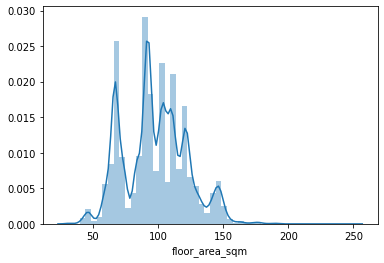

In [0]:
#histogram to plot the floor_area_sqm	
sns.distplot(df_train['floor_area_sqm']);

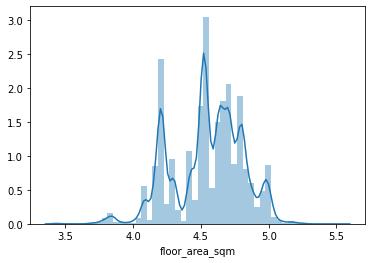

In [0]:
sns.distplot(np.log(df_train['floor_area_sqm'])) #Same but in log form

Also, let's do a histogram for Resale Prices

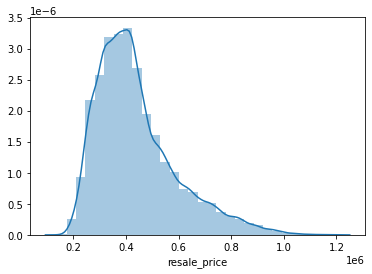

In [0]:
#histogram to plot the resale_prices
sns.distplot(df_train['resale_price'],bins=30);

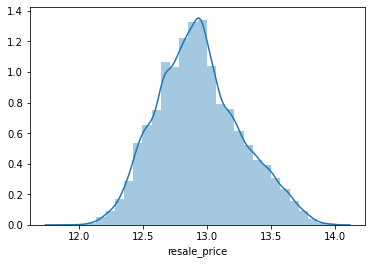

In [0]:
sns.distplot(np.log(df_train['resale_price']),bins=30) #Same but in log form

Let's analyze the Skewness and Kurtosis of the data

- A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes skewness and kurtosis.
- **Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. 
  - A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

- **Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 
  - That is, data sets with high kurtosis tend to have heavy tails, or outliers. 
  - Data sets with low kurtosis tend to have light tails, or lack of outliers. 
  - A uniform distribution would be the extreme case.

- The histogram is an effective graphical technique for showing both the skewness and kurtosis of data set.

<img src="https://www.researchgate.net/profile/Attila_Bonyar/publication/298415862/figure/fig1/AS:340236723867648@1458130164255/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of.png">

In [0]:
print("Skewness: %f" % df_train['resale_price'].skew())
print("Kurtosis: %f" % df_train['resale_price'].kurt())

Skewness: 1.140718
Kurtosis: 1.293331


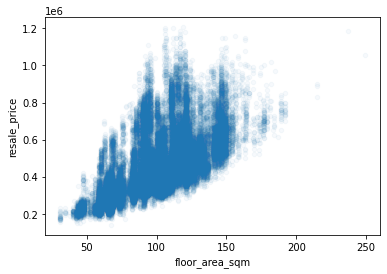

In [0]:
#scatter plot grlivarea/saleprice
var = 'floor_area_sqm'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='resale_price', alpha=0.041, norm='Normalize');

- We can infer from this graph that, the higher the floor area, the higher is the resale price of of the flat. By plotting distribution graph, we can spot if there are any outliers and remove them if they look too unusual.


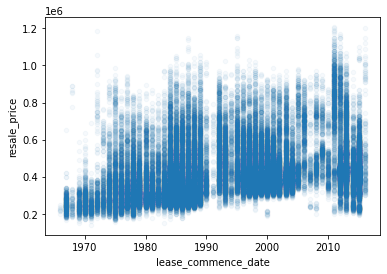

In [0]:
#scatter plot lease_commence_date/saleprice
var = 'lease_commence_date'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='resale_price', alpha=0.041, norm='Normalize');

- Besides that, we can also use boxplot to understand the distribution of our data. Below is a simple diagram of boxplot, and it is helpful in showing us the distribution of the target label given a particular feature.

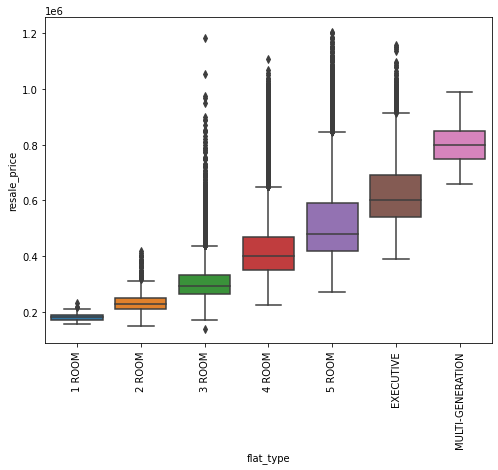

In [0]:
#box plot overallqual/saleprice
var = 'flat_type'
df_train = df_train.sort_values(var)
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var, y="resale_price", data=data)

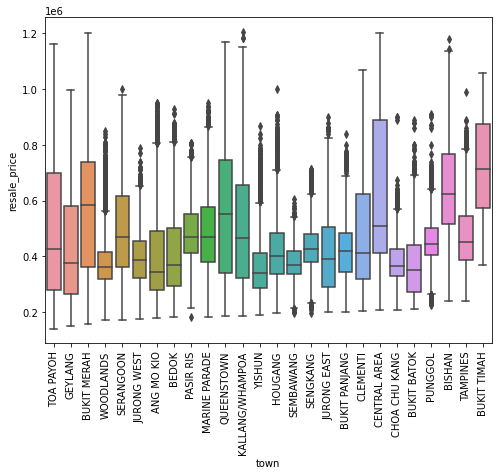

In [0]:
#box plot town/saleprice
var = 'town'
df_train = df_train.sort_values('resale_price')
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation=90)
fig = sns.boxplot(x=var, y="resale_price", data=data)

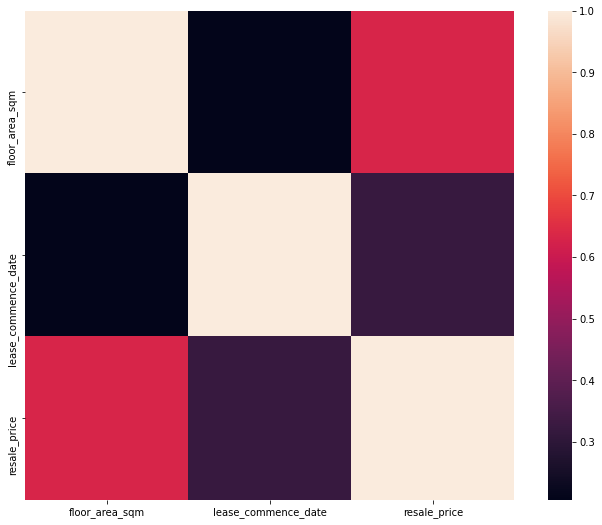

In [0]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,square=True);

- So what is the takeaway from this matrix? 
 - The color between floor area and the resale price are the lightest among other combinations. 
   - It means that **floor area and resale price are highly correlated** in a positive way — higher floor area, higher resale price.
 - In contrast, **toilet number and resale price have very low correlation**, which means toilet number might not be very useful in predicting the resale price of the flat.

## 3rd Feature Creation

- The features that are available in this data set are considerably small. 
  - But, nothing stop us from creating more!
  - Having more features is definitely going to help the machine learning model to learn the patterns of this data set.
- Some of the features that I think will be useful:
 - **Direction**. The town where the flat is located is given in this data set. 
 - How could we improve on this feature? I create a new feature, that map the town to one of the direction/region listed below:

### Creating Direction as Feature

In [0]:
east = "EAST"
west = "WEST"
north = "NORTH"
central = "CENTRAL"
unknow = "UNKNOWN"

town_to_geographical_region  = {
    "ANG MO KIO" : north,
    "BEDOK" : east,
    "BISHAN" : central,
    "BUKIT BATOK" : west,
    "BUKIT MERAH" : central,
    "BUKIT PANJANG" : west,
    "BUKIT TIMAH" : central,
    "CENTRAL AREA" : central,
    "CHOA CHU KANG" : west,
    "CLEMENTI" : west,
    "GEYLANG" : central,
    "HOUGANG" : north,
    "JURONG EAST" : west,
    "JURONG WEST" : west,
    "KALLANG/WHAMPOA" : central,
    "MARINE PARADE" : central,
    "PASIR RIS" : east,
    "PUNGGOL" : north,
    "QUEENSTOWN" : west,
    "SEMBAWANG" : north,
    "SENGKANG" : north,
    "SERANGOON" : north,
    "TAMPINES" : east,
    "TOA PAYOH" : central,
    "WOODLANDS" : north,
    "YISHUN" : north
}

In [0]:
df_train['direction'] = df_train['town'].apply(lambda x : town_to_geographical_region[x])

### Creating Room Number & Toilet Number

2. **Room number & toilet number**. 
  - Based on the flat type that is given, I check from the HDB website and find out the number of rooms and toilets and create two more new features.

In [0]:
set(df_train['flat_type'].unique())

{'1 ROOM',
 '2 ROOM',
 '3 ROOM',
 '4 ROOM',
 '5 ROOM',
 'EXECUTIVE',
 'MULTI-GENERATION'}

In [0]:
df_train['room_number'] = df_train['flat_type'].map({
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 3,
    'MULTI-GENERATION': 4,
    '1 ROOM': 1
})

In [0]:
df_train['toilet_number'] = df_train['flat_type'].map({
    '1 ROOM': 1,
    '2 ROOM': 1,
    '3 ROOM': 2,
    '4 ROOM': 2,
    '5 ROOM': 2,
    'EXECUTIVE': 2,
    'MULTI-GENERATION': 3
})

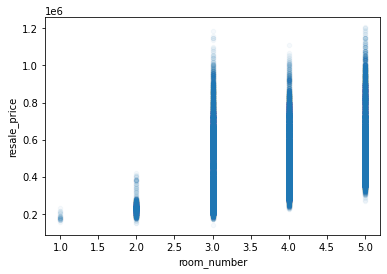

In [0]:
#scatter plot grlivarea/saleprice
var = 'room_number'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='resale_price', alpha=0.041, norm='Normalize');


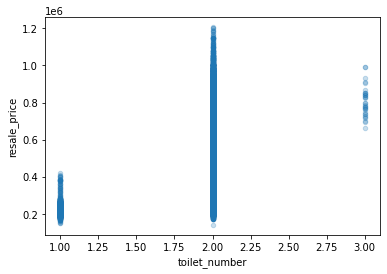

In [0]:
#scatter plot grlivarea/saleprice
var = 'toilet_number'
data = pd.concat([df_train['resale_price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='resale_price', alpha=0.241, norm='Normalize');


In [0]:
set(df_train['town'].unique())

{'ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN'}

3. **Storey**. 
   - The storey range features provided in the data is in a string format: 4 TO 6, 7 TO 9, which I think is sub-optimal because if your features are ordinal, you should convert the feature to number.
   - The reason being, floor 7 is lower than floor 9, and modeling the feature as number will help the model to learn this relationship. If we leave the feature as string without any processing, the model will miss out this great information.
   - So I create a random generator that will generate a number between the lowest storey and highest storey given in the dataset. 
      - Look at the example below to understand better:

In [0]:
df_train['storey_low'] = df_train['storey_range'].apply(lambda x: x.split(" ")[0]).astype('int')
df_train['storey_high'] = df_train['storey_range'].apply(lambda x: x.split(" ")[2]).astype('int')


In [0]:
df_train.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,direction,room_number,toilet_number,storey_low,storey_high
67892,2020-02,TOA PAYOH,3 ROOM,26,TOA PAYOH EAST,10 TO 12,67.0,Improved,1971,49 years 11 months,140000.0,CENTRAL,3,2,10,12
66129,2020-01,TOA PAYOH,2 ROOM,52,LOR 6 TOA PAYOH,01 TO 03,43.0,Standard,1983,62 years 05 months,150000.0,CENTRAL,2,1,1,3
59273,2019-10,GEYLANG,2 ROOM,68,CIRCUIT RD,04 TO 06,45.0,Standard,1969,48 years 03 months,150000.0,CENTRAL,2,1,4,6
66745,2020-02,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,10 TO 12,31.0,Improved,1975,54 years 01 month,157000.0,CENTRAL,1,1,10,12
35254,2018-09,GEYLANG,2 ROOM,39,CIRCUIT RD,04 TO 06,47.0,Standard,1971,51 years 04 months,160000.0,CENTRAL,2,1,4,6


In [0]:
from random import seed
from random import randint



In [0]:
seed(42)
storey_low = [o for o in df_train['storey_low']]
storey_high = [o for o in df_train['storey_high']]
storey_random = [randint(low,high) for low, high in zip(storey_low,storey_high)]
df_train['storey_random'] = storey_random

df_train.drop('storey_range',axis=1,inplace=True)
df_train.drop('storey_low',axis=1,inplace=True)
df_train.drop('storey_high',axis=1,inplace=True)

KeyError: ignored

In [0]:
df_train.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,direction,room_number,toilet_number,storey_random
67892,2020-02,TOA PAYOH,3 ROOM,26,TOA PAYOH EAST,67.0,Improved,1971,49 years 11 months,140000.0,CENTRAL,3,2,12
66129,2020-01,TOA PAYOH,2 ROOM,52,LOR 6 TOA PAYOH,43.0,Standard,1983,62 years 05 months,150000.0,CENTRAL,2,1,1
59273,2019-10,GEYLANG,2 ROOM,68,CIRCUIT RD,45.0,Standard,1969,48 years 03 months,150000.0,CENTRAL,2,1,4
66745,2020-02,BUKIT MERAH,1 ROOM,7,TELOK BLANGAH CRES,31.0,Improved,1975,54 years 01 month,157000.0,CENTRAL,1,1,12
35254,2018-09,GEYLANG,2 ROOM,39,CIRCUIT RD,47.0,Standard,1971,51 years 04 months,160000.0,CENTRAL,2,1,5


4. **Sales Year & Month**. 
  - The month originally given in the data set are in this format: 2018–4, so by breaking them up to ‘year’ and ‘month’ will allow the model to pick up the ordinal relationship.


In [0]:
df_train['sale_year'] = df_train['month'].apply(lambda x: x.split("-")[0]).astype('int')
df_train['sale_month'] = df_train['month'].apply(lambda x: x.split("-")[1]).astype('int')

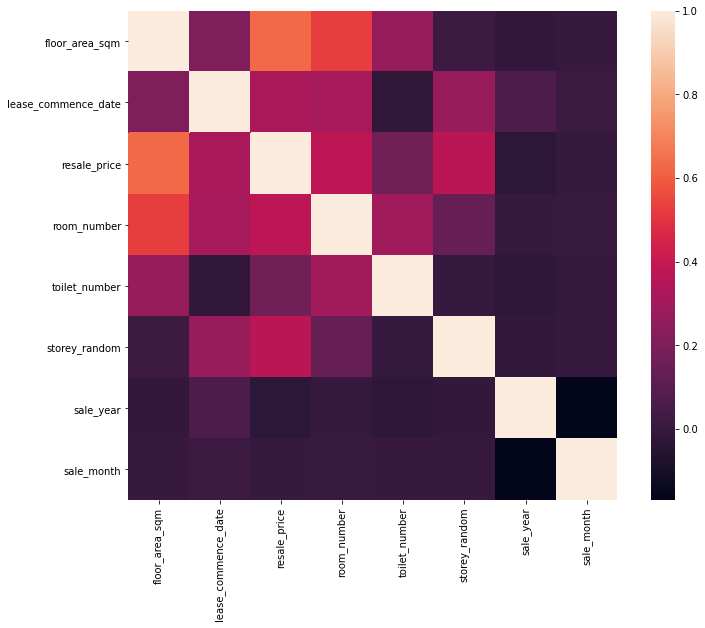

In [0]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,square=True);

- How effective are the newly created features in improving our model’s performance? 
  - I will be running multiple experiments and do some comparison with the base model. 
  - I will cover that in the later section of Results.

## 4th Delete feature that is not helpful

In [0]:
df_train = df_train.drop(['block'],axis=1)
df_train = df_train.drop(['month'],axis=1)


In [0]:
len(df_train)

68161

# Section for Machine Learning Geeks

## 5th Correct feature skewness

In [0]:
from scipy.special import boxcox1p
from scipy.stats import norm, skew #for some statistics

In [0]:
numeric_feats = df_train.select_dtypes(include=['number']).columns
skew_feats = df_train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
skew_feats.head(10)

storey_random          1.507340
resale_price           1.140692
floor_area_sqm         0.248286
sale_year              0.166564
lease_commence_date    0.099564
room_number           -0.015996
sale_month            -0.028786
toilet_number         -7.340712
dtype: float64

In [0]:
df_train['storey_random'] = boxcox1p(df_train['storey_random'],0.15)

## 6th Train test split

- We would need to split our data into train and test set to validate the accuracy of our model before we actually push this model into production. Something important to note when creating our train test set:
 - **The distribution of train and test set should be similar**. A bad example of train and test set will be, the flat in the train set are all from the east region and the flat in the test set are all from the west region. Clearly, the model that is being trained under such condition would not be very effective.
 - **The distribution of test set and the data in real life should be similar**. Test set serves as a safe estimate for you to know how well your system will perform before rolling out to production. If your test set do not capture what the distribution of real life data will be, then the results you get from the test set will not give you much confidence. There is a good chance that your system will perform badly in production.
- To produce a good train and test data set, we can use **Stratified Sampling**. Before we do stratified sampling, we need to decide a key feature that is important and would make sure that your train and test set distribution are similar based on this feature.
- For example, in our project, I have chosen location as the key feature to do stratified sampling. It is a good idea that the flat in train and test set are having a similar distribution in terms of location. Which means if your train set has 50% of flat in central, 30% of flat in west and 20% in east, you should maintain this ratio in your test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_all = df_train.drop('resale_price',axis=1)
x_all.head()

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,direction,room_number,toilet_number,storey_random,sale_year,sale_month
67892,TOA PAYOH,3 ROOM,TOA PAYOH EAST,67.0,Improved,1971,49 years 11 months,CENTRAL,3,2,3.128239,2020,2
66129,TOA PAYOH,2 ROOM,LOR 6 TOA PAYOH,43.0,Standard,1983,62 years 05 months,CENTRAL,2,1,0.730463,2020,1
59273,GEYLANG,2 ROOM,CIRCUIT RD,45.0,Standard,1969,48 years 03 months,CENTRAL,2,1,1.820334,2019,10
66745,BUKIT MERAH,1 ROOM,TELOK BLANGAH CRES,31.0,Improved,1975,54 years 01 month,CENTRAL,1,1,3.128239,2020,2
35254,GEYLANG,2 ROOM,CIRCUIT RD,47.0,Standard,1971,51 years 04 months,CENTRAL,2,1,2.055642,2018,9


In [0]:
y_all = np.log(df_train['resale_price'])
y_all.head()

67892    11.849398
66129    11.918391
59273    11.918391
66745    11.964001
35254    11.982929
Name: resale_price, dtype: float64

In [0]:
x_all = pd.get_dummies(x_all)
x_all.head()

,floor_area_sqm,lease_commence_date,room_number,toilet_number,storey_random,sale_year,sale_month,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,...,remaining_lease_93 years 10 months,remaining_lease_93 years 11 months,remaining_lease_94 years,remaining_lease_94 years 01 month,remaining_lease_94 years 02 months,remaining_lease_94 years 03 months,remaining_lease_94 years 04 months,remaining_lease_94 years 05 months,remaining_lease_94 years 06 months,remaining_lease_94 years 07 months,remaining_lease_94 years 08 months,remaining_lease_94 years 09 months,remaining_lease_94 years 10 months,remaining_lease_94 years 11 months,remaining_lease_95 years,remaining_lease_95 years 0 months,remaining_lease_95 years 01 month,remaining_lease_95 years 02 months,remaining_lease_95 years 03 months,remaining_lease_95 years 04 months,remaining_lease_95 years 05 months,remaining_lease_95 years 06 months,remaining_lease_95 years 07 months,remaining_lease_95 years 08 months,remaining_lease_95 years 09 months,remaining_lease_95 years 10 months,remaining_lease_95 years 11 months,remaining_lease_96 years,remaining_lease_96 years 01 month,remaining_lease_96 years 02 months,remaining_lease_96 years 03 months,remaining_lease_96 years 04 months,remaining_lease_96 years 05 months,remaining_lease_96 years 06 months,remaining_lease_96 years 07 months,remaining_lease_96 years 08 months,direction_CENTRAL,direction_EAST,direction_NORTH,direction_WEST
67892,67.0,1971,3,2,3.128239,2020,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
66129,43.0,1983,2,1,0.730463,2020,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
59273,45.0,1969,2,1,1.820334,2019,10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
66745,31.0,1975,1,1,3.128239,2020,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
35254,47.0,1971,2,1,2.055642,2018,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
dum_x_train,_,_,_ = train_test_split(df_train,y_all,stratify=df_train['town'],random_state=42)
dum_x_train.head()

,town,flat_type,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,direction,room_number,toilet_number,storey_random,sale_year,sale_month
50950,ANG MO KIO,5 ROOM,ANG MO KIO AVE 5,121.0,Improved,1980,60 years 05 months,520000.0,NORTH,5,2,0.730463,2019,6
38700,ANG MO KIO,5 ROOM,ANG MO KIO AVE 3,119.0,Improved,1979,59 years 02 months,595800.0,NORTH,5,2,1.820334,2018,11
59031,BUKIT PANJANG,3 ROOM,SEGAR RD,67.0,Model A,2015,94 years 09 months,310000.0,WEST,3,2,2.750250,2019,10
64501,YISHUN,4 ROOM,YISHUN RING RD,84.0,Simplified,1985,64 years 02 months,288000.0,NORTH,4,2,1.194318,2019,12
52507,WOODLANDS,4 ROOM,WOODLANDS AVE 1,92.0,Model A,2013,93 years 05 months,398000.0,NORTH,4,2,1.820334,2019,6


In [0]:
x_train,x_test,y_train,y_test = train_test_split(x_all,y_all,stratify=df_train['town'],random_state=42)

In [0]:
# Get smaller sample size to perform experiment

x_train, _ , y_train, _ = train_test_split(x_train,y_train,test_size=0.95,
                                           random_state=42,stratify=dum_x_train['town'])

## 7th Modeling

In [0]:
#!pip install mlflow

- MLflow is an open source platform for managing the end-to-end machine learning lifecycle. It tackles three primary functions:
  - **Tracking experiments** to record and compare parameters and results (MLflow Tracking).
  - **Packaging ML code** in a reusable, reproducible form in order to share with other data scientists or transfer to production (MLflow Projects).
  - **Managing and deploying models from a variety of ML libraries** to a variety of model serving and inference platforms (MLflow Models).
- MLflow is library-agnostic. You can use it with any machine learning library, and in any programming language, since all functions are accessible through a REST API and CLI. For convenience, the project also includes a Python API, R API, and Java API.

In [0]:
import mlflow
import mlflow.sklearn

- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. 
- It implements machine learning algorithms under the Gradient Boosting framework. 
  - XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 
  - The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [0]:
import as xgb

- Scikit-learn is a free machine learning library for Python. 
  - It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like NumPy and SciPy.

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

Creating a Class Called SklearnModelWithName

In [0]:
class SklearnModelWithName:
    def __init__(self,model_name,model_definition):
        self.model_name = model_name
        self.model_definition = model_definition

In [0]:
n_folds = 3

def rmsle_cv(model):
    kf = KFold(
        n_folds, 
        shuffle=True, 
        random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(
        -cross_val_score(
            model, 
            x_train.values, 
            y_train.values, 
            scoring="neg_mean_squared_error", 
            cv = kf))
    return(rmse)

def log_result(model_name,model_score,print_result=True):
    if print_result:
        print("{:s}: {:.4f} ({:.4f})\n".format(model_name,model_score.mean(), model_score.std()))
    model_score_mean_name = f"{model_name}_loss_score"
    model_score_std_name = f"{model_name}_std"
    mlflow.log_metric(
        model_score_mean_name,
        model_score.mean())
#   mlflow.log_metric(model_score_std_name,model_score.std())

def run_experiment(models,descriptions):
    mlflow.start_run(run_name="HDB Price Prediction")
    for i,o in enumerate(descriptions):
        mlflow.log_param(f"Description {i}",o)
    mlflow.log_param("Train data size", len(x_train))
    for model in models:
        score = rmsle_cv(model.model_definition)
        log_result(model.model_name,score)
    mlflow.end_run()

#### ElasticNet
https://scikit-learn.org/stable/modules/linear_model.html#elastic-net





- ElasticNet is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients. 
  - This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. 
  - We control the convex combination of l1 and l2 using the l1_ratio parameter.

- Elastic-net is useful when there are multiple features which are correlated with one another. 
  - Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

- A practical advantage of trading-off between Lasso and Ridge is that it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

- The objective function to minimize is in this case

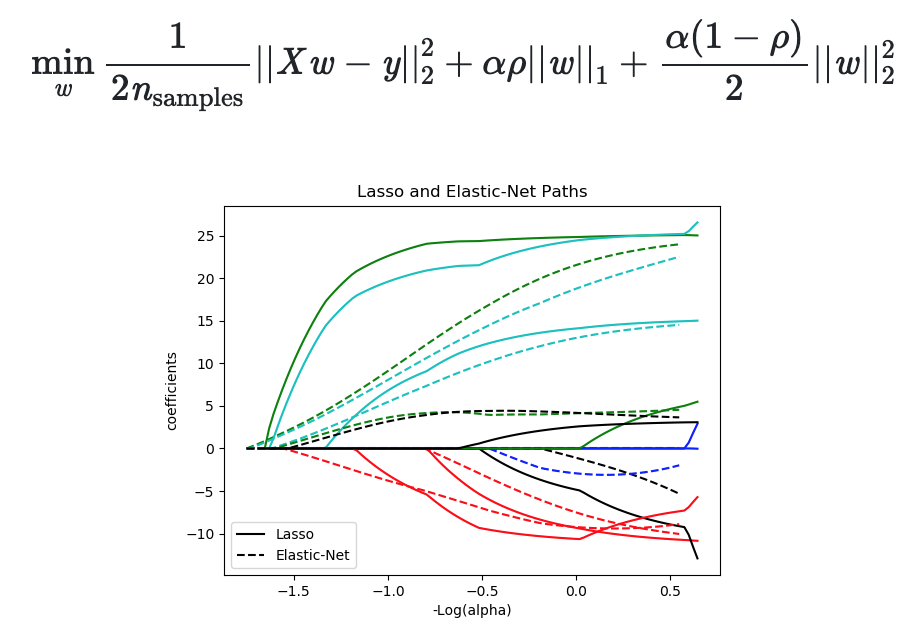

In [0]:
elasticnet = make_pipeline(RobustScaler(), ElasticNet(alpha =0.00001, random_state=1))
elasticnet = SklearnModelWithName("elasticnet",elasticnet)

#### SuporVectorMachine
- https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/
- https://scikit-learn.org/stable/modules/svm.html



- A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. 
 - After giving an SVM model sets of labeled training data for each  category, they’re able to categorize new text.
- So you’re working on a text classification problem. 
  - You’re refining your training data, and maybe you’ve even tried stuff out using Naive Bayes. 
  - But now you’re feeling confident in your dataset, and want to take it one step further. Enter Support Vector Machines (SVM): 
     - a fast and dependable classification algorithm that performs very well with a limited amount of data.
- Perhaps you have dug a bit deeper, and ran into terms like linearly separable, kernel trick and kernel functions. 
  - But fear not! The idea behind the SVM algorithm is simple, and applying it to natural language classification doesn’t require most of the complicated stuff.
- Before continuing, we recommend reading our guide to Naive Bayes classifiers first, since a lot of the things regarding text processing that are said there are relevant here as well.

- **Support vector machines (SVMs)** are a set of supervised learning methods used for classification, regression and outliers detection.
- The advantages of support vector machines are:
  - **Effective** in high dimensional spaces.
  - Still effective in cases where number of dimensions is greater than the number of samples.
  - Uses a **subset** of training points in the decision function (called support vectors), so it is also memory efficient.
  - **Versatile**: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

- **The disadvantages of support vector machines include**:
  - If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
  - SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

- The support vector machines in scikit-learn support both dense (numpy.ndarray and convertible to that by numpy.asarray) and sparse (any scipy.sparse) sample vectors as input. 
  - However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered numpy.ndarray (dense) or scipy.sparse.csr_matrix (sparse) with dtype=float64.

In [0]:
svm = make_pipeline(RobustScaler(),SVR(C=140))
svm  = SklearnModelWithName("svm",svm)

#### Lasso
https://scikit-learn.org/stable/modules/linear_model.html#lasso

- **The Lasso is a linear model that estimates sparse coefficients**. 
  - It is useful in some contexts due to its tendency to prefer solutions with fewer non-zero coefficients, effectively reducing the number of features upon which the given solution is dependent. 
  - For this reason Lasso and its variants are fundamental to the field of compressed sensing. 
  - Under certain conditions, it can recover the exact set of non-zero coefficients (see Compressive sensing: tomography reconstruction with L1 prior (Lasso)).
- Mathematically, it consists of a linear model with an added regularization term. The objective function to minimize is:

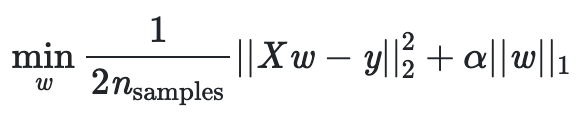

- The lasso estimate thus solves the minimization of the least-squares penalty with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x3B1;</mi>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>w</mi>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mo stretchy="false">|</mo>
    <mn>1</mn>
  </msub>
</math> added, where  is a constant and <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mo stretchy="false">|</mo>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <mi>w</mi>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mo stretchy="false">|</mo>
    <mn>1</mn>
  </msub>
</math> is the <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>&#x2113;</mi>
    <mn>1</mn>
  </msub>
</math>-norm of the coefficient vector.

The implementation in the class Lasso uses coordinate descent as the algorithm to fit the coefficients. See Least Angle Regression for another implementation:

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso = SklearnModelWithName("lasso",lasso)

#### GBoost

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

GradientBoostingRegressor supports a number of different loss functions for regression which can be specified via the argument loss; the default loss function for regression is least squares ('ls').

The figure below shows the results of applying GradientBoostingRegressor with least squares loss and 500 base learners to the Boston house price dataset (sklearn.datasets.load_boston). The plot on the left shows the train and test error at each iteration. The train error at each iteration is stored in the train_score_ attribute of the gradient boosting model. The test error at each iterations can be obtained via the staged_predict method which returns a generator that yields the predictions at each stage. Plots like these can be used to determine the optimal number of trees (i.e. n_estimators) by early stopping. The plot on the right shows the feature importances which can be obtained via the feature_importances_ property.
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_gradient_boosting_regression_0011.png">

In [0]:
GBoost = GradientBoostingRegressor(loss='huber',min_samples_split=10,n_estimators=200)
GBoost = SklearnModelWithName("gboost",GBoost)

#### XGBRegressor
- https://www.datacamp.com/community/tutorials/xgboost-in-python
- https://xgboost.readthedocs.io/en/latest/tutorials/model.html

Boosting is a **sequential technique which works on the principle of an ensemble**. 
- It combines a set of weak learners and delivers improved prediction accuracy. 
  - At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. 
  - The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. 
  - Note that a weak learner is one which is slightly better than random guessing. 
  - For example, a decision tree whose predictions are slightly better than 50%. Let's understand boosting in general with a simple illustration.

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1528107577/output_1_0_ilvuyr.png">

Four classifiers (in 4 boxes), shown above, are trying to classify + and - classes as homogeneously as possible.

1. **Box 1**: The first classifier (usually a decision stump) creates a vertical line (split) at D1. It says anything to the left of D1 is + and anything to the right of D1 is -. However, this classifier misclassifies three + points.

Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.

2. **Box 2**: The second classifier gives more weight to the three + misclassified points (see the bigger size of +) and creates a vertical line at D2. Again it says, anything to the right of D2 is - and left is +. Still, it makes mistakes by incorrectly classifying three - points.

3. **Box 3**: Again, the third classifier gives more weight to the three - misclassified points and creates a horizontal line at D3. Still, this classifier fails to classify the points (in the circles) correctly.

4. **Box 4**: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.



- That's the basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it. 
- Now, let's come to XGBoost. 
  - To begin with, you should know about the default base learners of XGBoost: tree ensembles. The tree ensemble model is a set of classification and regression trees (CART). 
  - Trees are grown one after another ,and attempts to reduce the misclassification rate are made in subsequent iterations. 
  - Here’s a simple example of a CART that classifies whether someone will like computer games straight from the XGBoost's documentation.
- If you check the image in Tree Ensemble section, you will notice each tree gives a different prediction score depending on the data it sees and the scores of each individual tree are summed up to get the final score.

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb = SklearnModelWithName("model_xgb",model_xgb)

#### ExtraTreesRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

An “extra trees” classifier, otherwise known as an “Extremely randomized trees” classifier, is a variant of a random forest. 
- Unlike a random forest, at each step the entire sample is used and decision boundaries are picked at random, rather than the best one. 
- In real world cases, performance is comparable to an ordinary random forest, sometimes a bit better.
https://orbi.uliege.be/handle/2268/9357

- The Extra-Tree method (standing for extremely randomized trees) was proposed in [GEW06], with the main objective of f**urther randomizing tree building in the context of numerical input features**, where the choice of the optimal cut-point is responsible for a large proportion of the variance of the induced tree.

- With respect to random forests, the method drops the idea of using bootstrap copies of the learning sample, and instead of trying to find an optimal cut-point for each one of the K randomly chosen features at each node, it **selects a cut-point at random**.

- This idea is rather productive in the context of many problems characterized by a large number of numerical features varying more or less continuously: it **leads often to increased accuracy thanks to its smoothing and at the same time significantly reduces computational burdens linked to the determination of optimal cut-points in standard trees and in random forests**.

- From a statistical point of view, dropping the bootstrapping idea leads to an advantage in terms of bias, whereas the cut-point randomization has often an excellent variance reduction effect. This method has yielded state-of-the-art results in several high-dimensional complex problems.

- From a functional point of view, the Extra-Tree method produces piece-wise multilinear approximations, rather than the piece-wise constant ones of random forests [GEW06].

In [0]:
extra_tree = ExtraTreesRegressor(n_estimators=100,n_jobs=4,min_samples_split=10)
extra_tree = SklearnModelWithName("extra_tree",extra_tree)

#### RandomForestRegressor
https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees

A random forest regressor.

- A random forest is a meta estimator that **fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting**. 
- The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In random forests, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

- Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features. (See the parameter tuning guidelines for more details).
- The purpose of these two sources of randomness is to **decrease the variance of the forest estimator**. 
  - Indeed, individual decision trees typically exhibit high variance and tend to overfit. 
  - The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. 
  - By taking an average of those predictions, some errors can cancel out. 
  - Random forests achieve a reduced variance by **combining diverse trees**, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.
- In contrast to the original publication [B2001], the scikit-learn implementation combines classifiers by **averaging their probabilistic prediction**, instead of letting each classifier vote for a single class.

In [0]:
random_forest = RandomForestRegressor(n_estimators=100,n_jobs=4,min_samples_split=10)
random_forest = SklearnModelWithName("random_forest",random_forest)

#### KernelRidge
https://scikit-learn.org/stable/modules/kernel_ridge.html#

- Kernel ridge regression (KRR) [M2012] combines Ridge regression and classification (linear least squares with l2-norm regularization) with the kernel trick. 
  - It thus learns a linear function in the space induced by the respective kernel and the data. 
  - For non-linear kernels, this corresponds to a non-linear function in the original space.

- **The form of the model learned by KernelRidge is identical to support vector regression (SVR)**. 
  - However, different loss functions are used: 
     - KRR uses squared error loss while support vector regression uses -insensitive loss, both combined with l2 regularization. 
     - In contrast to SVR, fitting KernelRidge can be done in closed-form and is typically faster for medium-sized datasets. 
     - On the other hand, the learned model is non-sparse and thus slower than SVR, which learns a sparse model for , at prediction-time.

The following figure compares KernelRidge and SVR on an artificial dataset, which consists of a sinusoidal target function and strong noise added to every fifth datapoint. 
- The learned model of KernelRidge and SVR is plotted, where both complexity/regularization and bandwidth of the RBF kernel have been optimized using grid-search. 
- The learned functions are very similar; however, fitting KernelRidge is approx. seven times faster than fitting SVR (both with grid-search). However, prediction of 100000 target values is more than three times faster with SVR since it has learned a sparse model using only approx. 1/3 of the 100 training datapoints as support vectors.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kernel_ridge_regression_0011.png">

- The next figure compares the time for fitting and prediction of KernelRidge and SVR for different sizes of the training set. 
 - Fitting KernelRidge is faster than SVR for medium-sized training sets (less than 1000 samples); however, for larger training sets SVR scales better. With regard to prediction time, SVR is faster than KernelRidge for all sizes of the training set because of the learned sparse solution. Note that the degree of sparsity and thus the prediction time depends on the parameters  and  of the SVR;  would correspond to a dense model.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_kernel_ridge_regression_0021.png">

*Ref: “Machine Learning: A Probabilistic Perspective” Murphy, K. P. - chapter 14.4.3, pp. 492-493, The MIT Press, 2012*

In [0]:
krr = KernelRidge(alpha=1e-5,kernel='polynomial',degree=3)
krr = SklearnModelWithName("krr",krr)

## 8th Stacking Classifier

In [0]:
class StackClassifer(BaseEstimator, TransformerMixin, RegressorMixin):
    def __init__(self,base_models,meta_model):
        self.base_models = base_models
        self.meta_model = meta_model

    def fit_model(self,_model,_x,_y):
        _model.fit(_x,_y)
        return _model
        
    def fit(self,X,y):
        self.base_models_ = clone(self.base_models)
        self.meta_model_ = clone(self.meta_model)
        for base_model in self.base_models_:
            base_model.fit(X,y)
        y_pred = np.array([base_model.predict(X) for base_model in self.base_models_])
        meta_train = y_pred.mean(axis=0,keepdims=True).T
        self.meta_model_.fit(meta_train,y)
        return self
    
    def predict(self,X):
        y_pred = np.array([base_model.predict(X) for base_model in self.base_models_])
        meta_train = y_pred.mean(axis=0,keepdims=True).T
        return self.meta_model_.predict(meta_train)

In [0]:
experiment_description = [
    'Combination of every thing'
]
base_models_w_name = [elasticnet,svm,extra_tree,model_xgb]
meta_model_w_name = lasso
base_models = [o.model_definition for o in base_models_w_name]
meta_model = meta_model_w_name.model_definition
stack_clf = StackClassifer(base_models,meta_model)
stack_clf = SklearnModelWithName("stack_clf",stack_clf)
run_experiment([elasticnet,svm,lasso,
                GBoost,model_xgb,extra_tree,random_forest],experiment_description)

elasticnet: 0.1095 (0.0021)

svm: 0.1080 (0.0048)

lasso: 0.1124 (0.0055)

gboost: 0.1052 (0.0029)



/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:249: DeprecationWarning: The silent parameter is deprecated.Please use verbosity instead.silent is depreated
  'silent is depreated', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:249: DeprecationWarning: The silent parameter is deprecated.Please use verbosity instead.silent is depreated
  'silent is depreated', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is de

model_xgb: 0.1050 (0.0036)

extra_tree: 0.1111 (0.0007)

random_forest: 0.1178 (0.0062)



## 9th Prediction

In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
base_models_w_name = [elasticnet,svm,extra_tree,model_xgb]
meta_model_w_name = lasso
base_models = [o.model_definition for o in base_models_w_name]
meta_model = meta_model_w_name.model_definition

stack_clf = StackClassifer(base_models,meta_model)
stack_clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:242: DeprecationWarning: The nthread parameter is deprecated as of version .6.Please use n_jobs instead.nthread is deprecated.
  'nthread is deprecated.', DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/xgboost/sklearn.py:249: DeprecationWarning: The silent parameter is deprecated.Please use verbosity instead.silent is depreated
  'silent is depreated', DeprecationWarning)


StackClassifer(base_models=[Pipeline(memory=None,
                                     steps=[('robustscaler',
                                             RobustScaler(copy=True,
                                                          quantile_range=(25.0,
                                                                          75.0),
                                                          with_centering=True,
                                                          with_scaling=True)),
                                            ('elasticnet',
                                             ElasticNet(alpha=1e-05,
                                                        copy_X=True,
                                                        fit_intercept=True,
                                                        l1_ratio=0.5,
                                                        max_iter=1000,
                                                        normalize=False,
              

In [0]:
y_pred = stack_clf.predict(x_test)

In [0]:
y_pred

array([12.9801284 , 13.41274664, 12.7840558 , ..., 12.6773927 ,
       13.31042009, 12.51573999])

In [0]:
stack_clf.predict(x_test.head(1))

array([12.9801284])

#### Root Mean Squared Logarithmic Error (RMSLE)
https://www.kaggle.com/c/ashrae-energy-prediction/discussion/113064

https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a

<img src="https://miro.medium.com/max/1400/0*AUzyQ1rc6mpQVYfn" width="400">

```python
import math

def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5
```



https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)

- Mean squared logarithmic error (MSLE) can be interpreted as a **measure of the ratio between the true and predicted values**.

  - Mean squared logarithmic error is, as the name suggests, a variation of the Mean Squared Error.

  - **MSLE only care about the percentual difference**

- The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

   - **This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values**.

**MSLE penalizes underestimates more than overestimates**

MSLE also penalizes underestimates more than overestimates, **introducing an asymmetry in the error curve**.

In [0]:
rmsle(y_test,y_pred)

# More Information and sources

https://elearn.hackwagon.com/projects/eXDXM4HrHiE43TQtP
https://github.com/leexa90/HDB-prices/blob/master/Analysis.ipynb
https://simply-python.com/2016/02/21/retrieving-singapore-housing-hdb-resale-prices-with-python/
https://medium.com/@tianjie1112/singapore-hdb-resale-price-prediction-data-preparation-ae674e65b4d
https://www.kaggle.com/chenzhiliang/predicting-the-prices-of-hdb-flats-in-sg
